In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

In [2]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(),download=True)



Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw




Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw




Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw




Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
print("Training examples: {}".format(len(mnist_train)))
print("Test examples: {}".format(len(mnist_test)))

Training examples: 60000
Test examples: 10000


Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])
The label for this image: 1


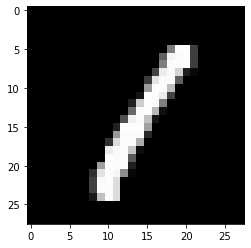

In [4]:
# Pick out the 4th (0-indexed) example from the training set
image, label = mnist_train[3]

# Plot the image
print("Default image shape: {}".format(image.shape))
image = image.reshape([28,28])
print("Reshaped image shape: {}".format(image.shape))
plt.imshow(image, cmap="gray")

# Print the label
print("The label for this image: {}".format(label))

Default image shape torch.Size([1, 28, 28])
Reshaped image shape torch.Size([28, 28])


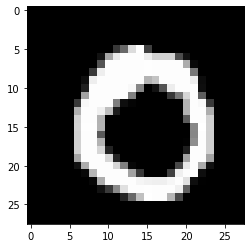

In [6]:
image,label = mnist_train[56]
#plotting image
print("Default image shape", image.shape)
image = image.reshape([28,28])
print("Reshaped image shape", image.shape)
plt.imshow(image, cmap="gray")



In [8]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=100,shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=100,shuffle=True)

In [21]:
#an example of minibatch for train drawn from the above dataloader
data_train_iter = iter(train_loader)
images,labels  = data_train_iter.next()
print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))
print(images[0].shape)
#there are 100 data, each containing 28 * 28 datas for the image


Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])
torch.Size([1, 28, 28])


What is the meaning of parameter -1?
If there is any situation that you don't know how many rows you want but are sure of the number of columns, then you can specify this with a -1. (Note that you can extend this to tensors with more dimensions. Only one of the axis value can be -1). This is a way of telling the library: "give me a tensor that has these many columns and you compute the appropriate number of rows that is necessary to make this happen".

In [23]:
#flatten the input
x = images.view(-1,28*28)
print("The shape of input x: {}",format(x.shape))

The shape of input x: {} torch.Size([100, 784])


In [24]:
#initialize weights
W = torch.randn(784,10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10,requires_grad=True)
# As both W and b are parameters we wish to learn, we set requires_grad to True. 
# This tells PyTorch's autograd to track the gradients for these two variables, and all the variables depending on W and b.

In [26]:
#linear transformation y = x*w+b
y=torch.matmul(x,W)+b
print(y[0,:])

tensor([-0.1350,  0.1563, -0.3884, -0.1399, -0.1165, -0.0543,  0.2585,  0.0512,
        -0.1706, -0.2159], grad_fn=<SliceBackward>)


In [32]:
#computing softmax using eqn
py_eq = torch.exp(y)/torch.sum(torch.exp(y),dim=1,keepdim=True) #dim=1 means to add all across the row and have only one column (axis =1)
print("py[0] from equation: {}".format(py_eq[0]))

#computing softmax using pytorch
import torch.nn.functional as F
py  = F.softmax(y,dim=1)
print("py[0] from equation: {}".format(py_eq[0]))


py[0] from equation: tensor([0.0927, 0.1241, 0.0720, 0.0923, 0.0944, 0.1005, 0.1374, 0.1117, 0.0895,
        0.0855], grad_fn=<SelectBackward>)
py[0] from equation: tensor([0.0927, 0.1241, 0.0720, 0.0923, 0.0944, 0.1005, 0.1374, 0.1117, 0.0895,
        0.0855], grad_fn=<SelectBackward>)


In [47]:
#crossentropy loss:
#loss = - Sigma(actual_ylog(predicted_y))
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross entropy from equation: {}".format(cross_entropy_eq))

cross_entropy = F.cross_entropy(y,labels)
print("cross entropy from equation: {}".format(cross_entropy))


cross entropy from equation: 2.3174171447753906
cross entropy from equation: 2.3174173831939697


In [49]:
#optimization
optimizer = torch.optim.SGD([W,b],lr=0.1)
cross_entropy.backward()


RuntimeError: ignored

In [50]:
b.grad

tensor([ 0.0010, -0.0155,  0.0020, -0.0485,  0.0081,  0.0295,  0.0153,  0.0008,
        -0.0264,  0.0338])

In [51]:
optimizer.step()
b

tensor([-9.9974e-05,  1.5546e-03, -2.0450e-04,  4.8506e-03, -8.1243e-04,
        -2.9478e-03, -1.5267e-03, -7.8929e-05,  2.6446e-03, -3.3795e-03],
       requires_grad=True)

In [52]:
print("b.grad before zero_grad(): {}".format(b.grad))
optimizer.zero_grad()
print("b.grad after zero_grad(): {}".format(b.grad))

b.grad before zero_grad(): tensor([ 0.0010, -0.0155,  0.0020, -0.0485,  0.0081,  0.0295,  0.0153,  0.0008,
        -0.0264,  0.0338])
b.grad after zero_grad(): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


Model Training
To train the model, we just need repeat what we just did for more minibatches from the training set. As a recap, the steps were:

Draw a minibatch
Zero the gradients in the buffers for W and b
Perform the forward pass (compute prediction, calculate loss)
Perform the backward pass (compute gradients, perform SGD step)

In [54]:
for images,labels in tqdm(train_loader):
  #zero out the gradients in every loop
  optimizer.zero_grad()
  #forward pass
  x = images.view(-1,28*28)
  y = torch.matmul(x,W)+b
  cross_entropy = F.cross_entropy(y,labels)
  #backward pass
  cross_entropy.backward()
  optimizer.step()

In [56]:
#Testing
correct =0
total = len(mnist_test)

with torch.no_grad(): # we do not need to compute gradients here so will be faster
  for images,labels in tqdm(test_loader):
    #forward pass
    x=images.view(-1,28*28)
    y = torch.matmul(x,W)+b
    predictions = torch.argmax(y,dim=1)# get the highest prediction 
    correct += torch.sum((predictions==labels).float())

print("Test accuracy:{}".format(correct/total))




Test accuracy:0.9020000100135803


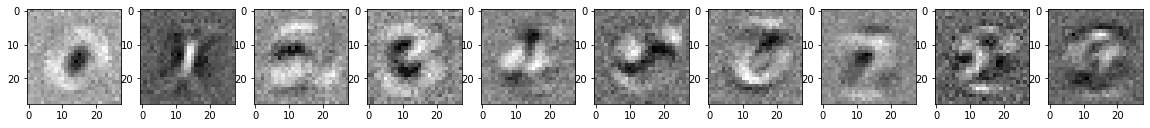

In [57]:
#visualizing weights
fig, ax = plt.subplots(1,10,figsize=(20,2))
for digit in range(10):
  ax[digit].imshow(W[:,digit].detach().view(28,28),cmap='gray')

In [59]:
#full code using nn module

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

class MNIST_LR(nn.Module):
  def __init__(self, x_size, label_size):
    super().__init__()
    self.lin = nn.Linear(x_size,label_size)

  def forward(self,x):
    return self.lin(x)


# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Instantiate model
model = MNIST_LR(28*28,10)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = model(x)
    loss = criterion(y, labels)
    # Backward pass
    loss.backward()
    optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = model(x)
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))






Test accuracy: 0.9018999934196472
